In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt

In [32]:
data = pd.read_csv('data_clean_csv.csv')
data

,Temperature,Mass Loss,Density,Porosity,P-Wave,S-Wave,Ed,Damage,TC
0,25,0.000000,2.666755,1.12000,3683.000,2173.000,36.17317,0.000000,2.393781
1,25,0.000000,2.693423,1.13120,3719.830,2194.730,37.26925,0.000000,2.417719
2,25,0.000000,2.690756,1.13008,3716.147,2192.557,37.15866,0.000000,2.415325
3,25,0.000000,2.688089,1.12896,3712.464,2190.384,37.04829,0.000000,2.412931
4,25,0.000000,2.685422,1.12784,3708.781,2188.211,36.93814,0.000000,2.410537
5,25,0.000000,2.682756,1.12672,3705.098,2186.038,36.82820,0.000000,2.408144
6,25,0.000000,2.680089,1.12560,3701.415,2183.865,36.71848,0.000000,2.405750
7,25,0.000000,2.677422,1.12448,3697.732,2181.692,36.60899,0.000000,2.403356
8,100,0.041000,2.642827,1.30000,3824.000,2179.000,38.64600,-0.078034,2.381300
9,100,0.041410,2.669255,1.31300,3862.240,2200.790,39.81701,-0.078814,2.405113


In [33]:
data.corr()

,Temperature,Mass Loss,Density,Porosity,P-Wave,S-Wave,Ed,Damage,TC
Temperature,1.000000,0.977289,-0.966356,0.975597,-0.980631,-0.987522,-0.981422,0.980923,-0.954533
Mass Loss,0.977289,1.000000,-0.940969,0.967261,-0.981215,-0.986775,-0.980839,0.982749,-0.952369
Density,-0.966356,-0.940969,1.000000,-0.896012,0.925793,0.934806,0.963380,-0.956466,0.869406
Porosity,0.975597,0.967261,-0.896012,1.000000,-0.982732,-0.986207,-0.949586,0.953768,-0.984133
P-Wave,-0.980631,-0.981215,0.925793,-0.982732,1.000000,0.993789,0.984292,-0.987353,0.984001
S-Wave,-0.987522,-0.986775,0.934806,-0.986207,0.993789,1.000000,0.983184,-0.985411,0.972814
Ed,-0.981422,-0.980839,0.963380,-0.949586,0.984292,0.983184,1.000000,-0.999590,0.940242
Damage,0.980923,0.982749,-0.956466,0.953768,-0.987353,-0.985411,-0.999590,1.000000,-0.945986
TC,-0.954533,-0.952369,0.869406,-0.984133,0.984001,0.972814,0.940242,-0.945986,1.000000


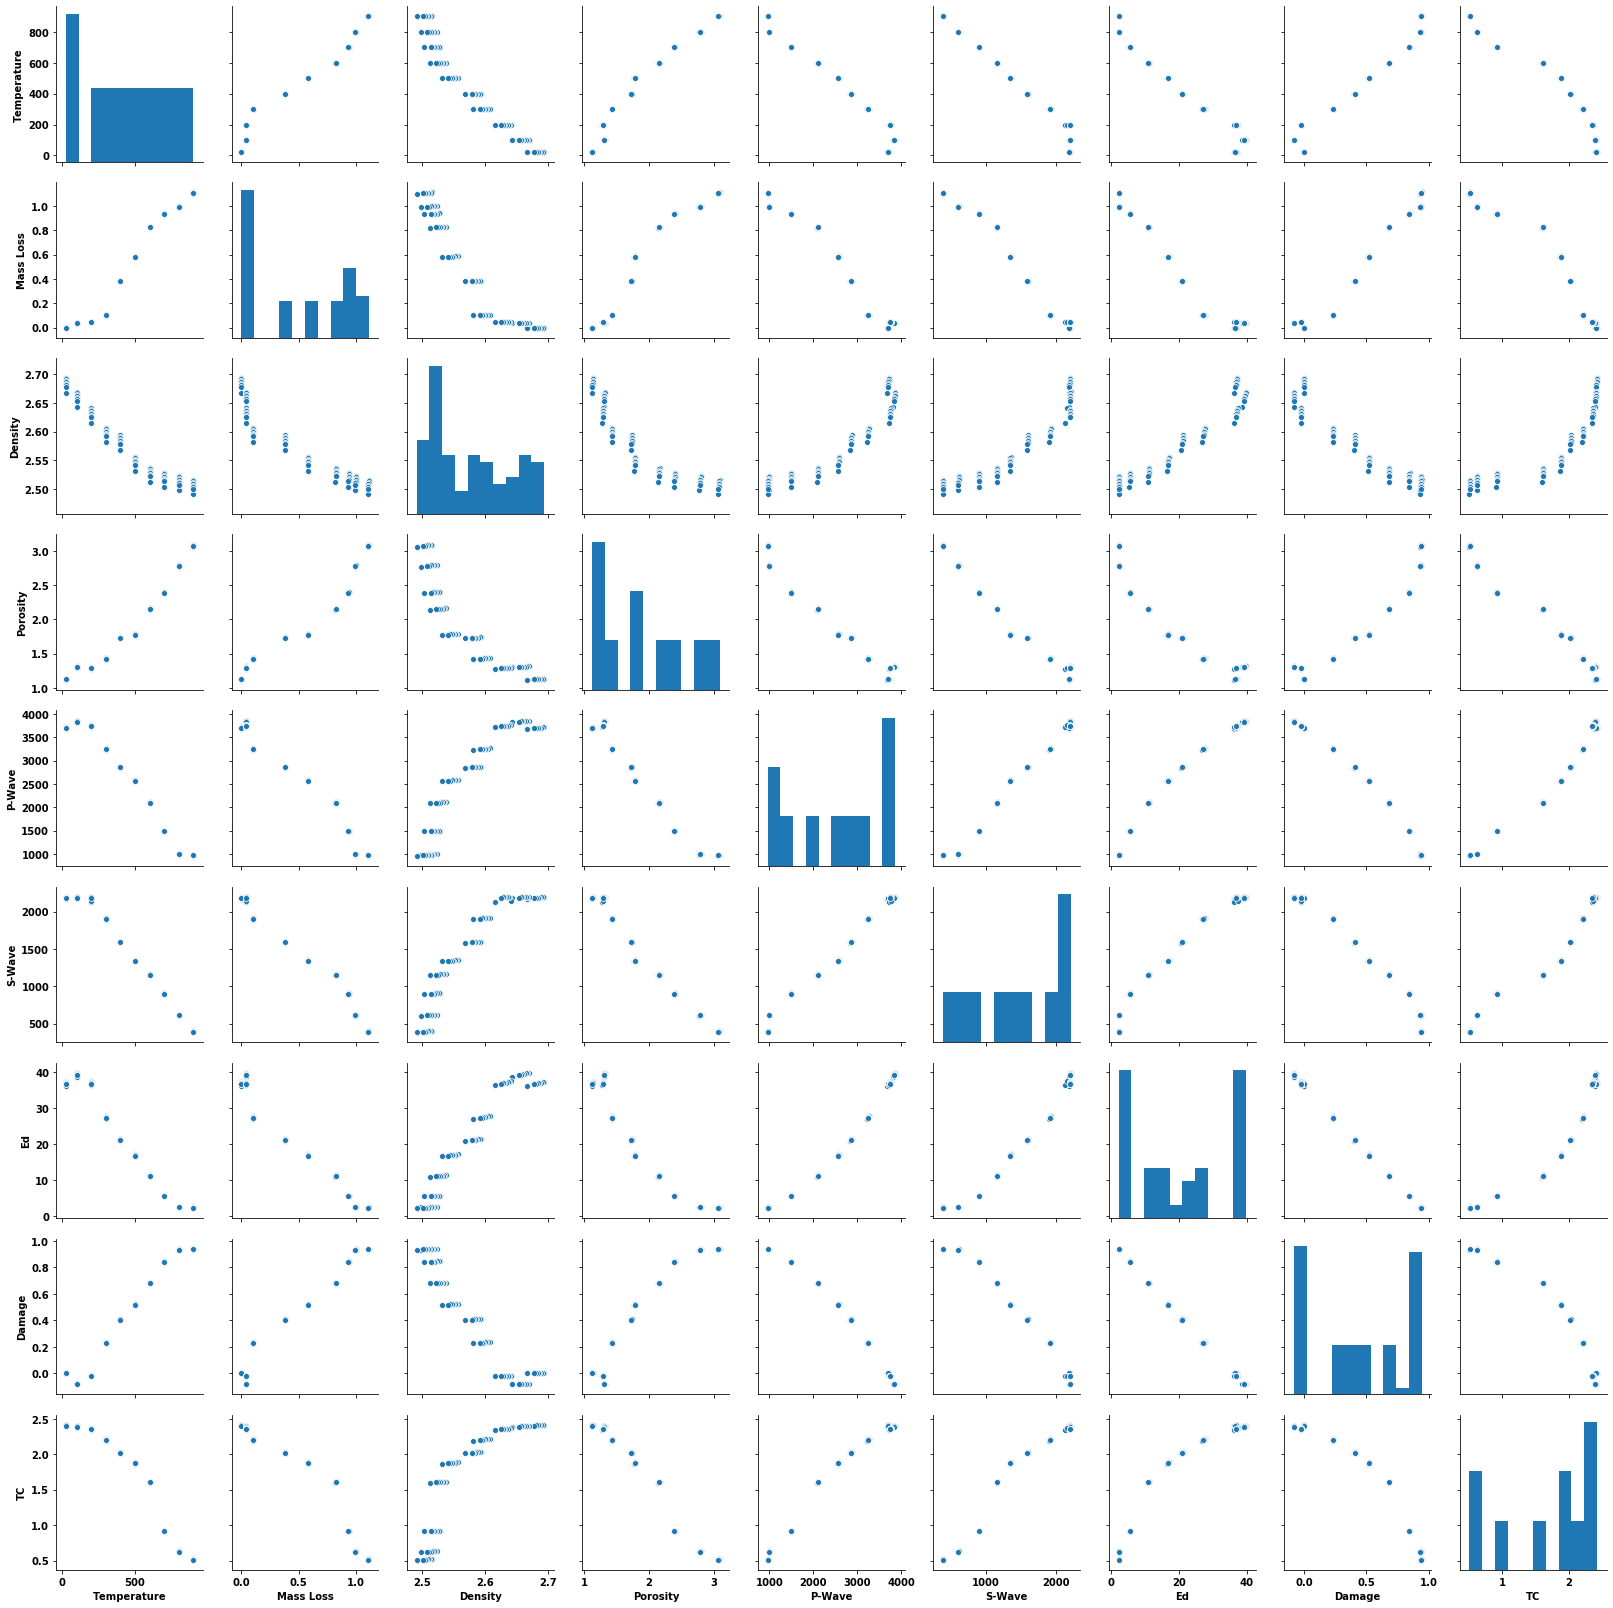

Wall time: 33.1 s


In [34]:
%%time

sns.pairplot(data)
plt.show()

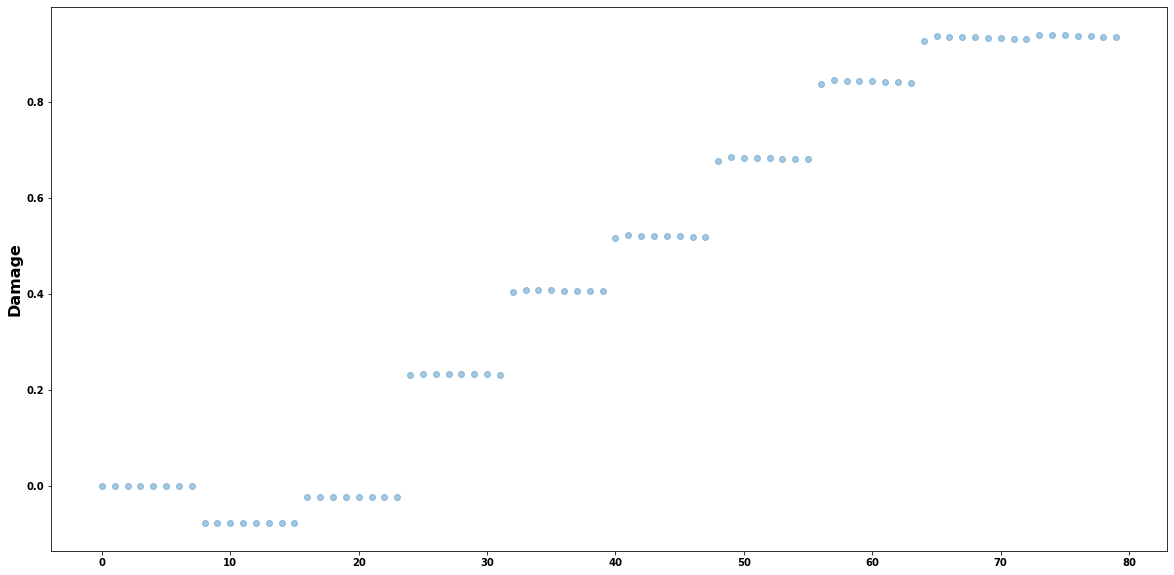

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(x=data.index, y=data['Damage'], alpha=0.4)
plt.ylabel('Damage', fontsize=16)
plt.show()

In [36]:
damage = data['Damage']
TC = data['TC']
features = data.drop(['Damage', 'TC'], axis=1)

In [37]:
X_train, X_test, y1_train, y1_test = train_test_split(features, damage, test_size=0.25, random_state=10)

In [38]:
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y1_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y1_pre = regressor.predict(X_train)
y1_pre

array([0.58570007, 0.97228867, 0.04325595, 0.97065023, 0.342986  ,
       0.92999422, 0.01611459, 0.04761368, 0.34385083, 0.44898954,
       0.04548467, 0.44515592, 0.92937928, 0.44745609, 0.97092331,
       0.97119638, 0.20914953, 0.01143342, 0.5888701 , 0.92907182,
       0.58696808, 0.04669882, 0.92845688, 0.77065935, 0.97010409,
       0.0409607 , 0.20117861, 0.92968675, 0.20516408, 0.03866145,
       0.01377401, 0.76604552, 0.58760209, 0.20416771, 0.0455512 ,
       0.97037716, 0.76696829, 0.19918588, 0.76881382, 0.76789106,
       0.04321027, 0.0149443 , 0.92876435, 0.58633408, 0.58506607,
       0.33866184, 0.76835244, 0.58823609, 0.01260371, 0.05901267,
       0.34125633, 0.45205644, 0.05003347, 0.96955794, 0.02196604,
       0.20317135, 0.20217498, 0.93122408, 0.01728488, 0.01026312])

In [40]:
y1_pred = regressor.predict(X_test)
y1_pred

array([0.44438919, 0.44822282, 0.20018225, 0.34731014, 0.3403915 ,
       0.92814941, 0.04440357, 0.04093586, 0.34212116, 0.04210833,
       0.44668937, 0.33952667, 0.44592264, 0.96983102, 0.03979865,
       0.04434747, 0.59140612, 0.76650691, 0.04207306, 0.76742967])

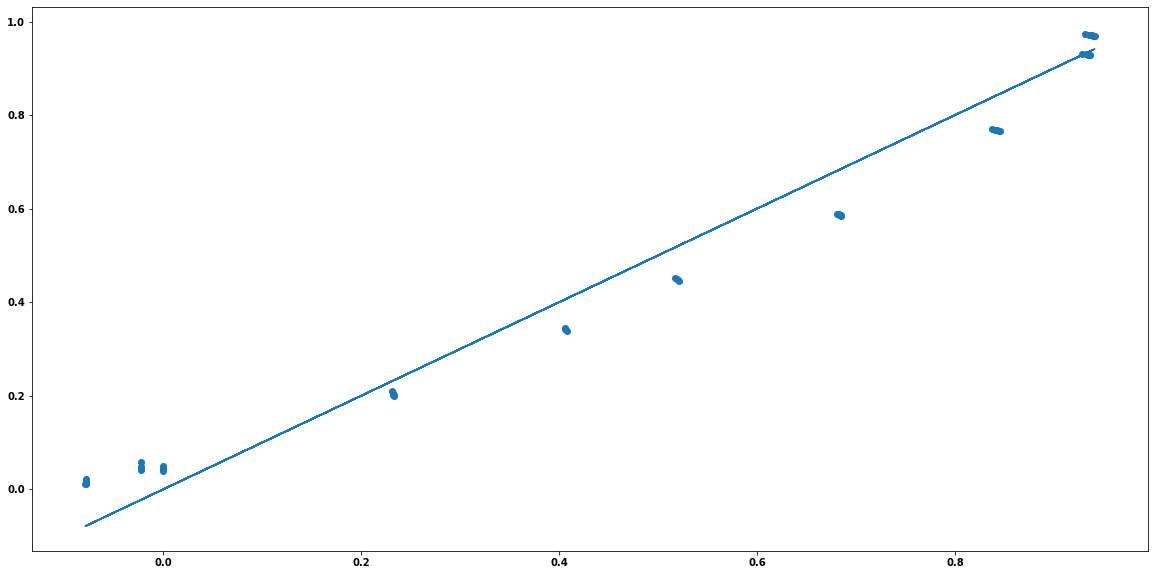

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(y1_train, y1_pre)
plt.plot(y1_train, y1_train)
plt.show()

In [43]:
def rmse(h,y):
    return sqrt(mean_squared_error(h,y))

In [44]:
rmse(y1_pre, y1_train)

0.0653409869444567

In [45]:
y1_pred = regressor.predict(X_test)
y1_pred

array([0.44438919, 0.44822282, 0.20018225, 0.34731014, 0.3403915 ,
       0.92814941, 0.04440357, 0.04093586, 0.34212116, 0.04210833,
       0.44668937, 0.33952667, 0.44592264, 0.96983102, 0.03979865,
       0.04434747, 0.59140612, 0.76650691, 0.04207306, 0.76742967])

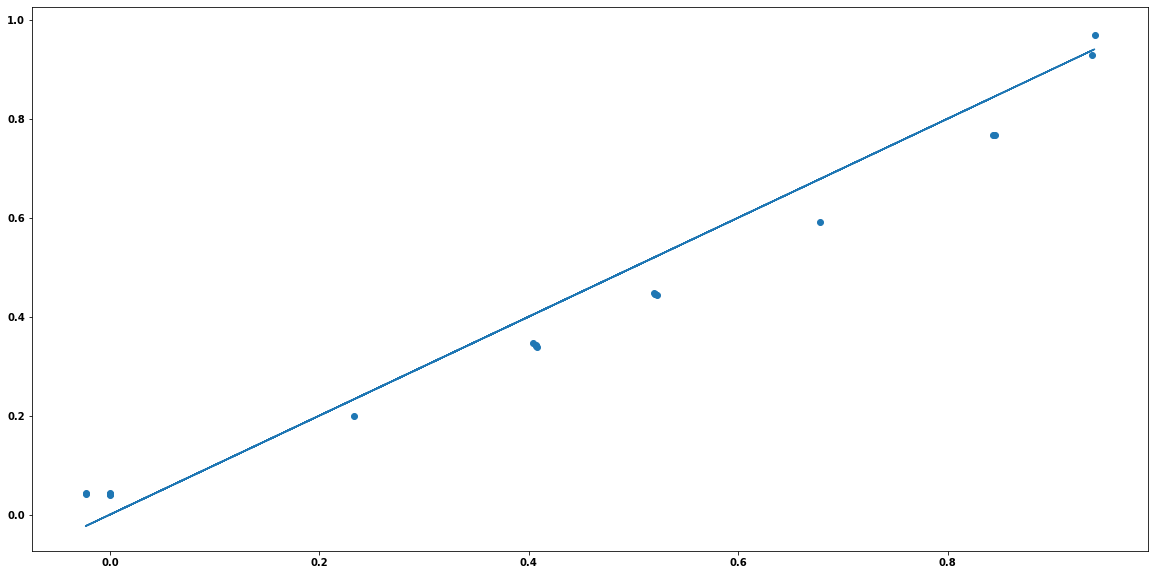

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(y1_test, y1_pred)
plt.plot(y1_test, y1_test)
plt.show()

In [46]:
def rmse(h,y):
    return sqrt(mean_squared_error(h,y))

In [47]:
rmse(y1_pred, y1_test)

0.061645931725348595

# For TC

In [48]:
X_train, X_test, y2_train, y2_test = train_test_split(features, TC, test_size=0.25, random_state=10)

In [87]:
regressor = SVR(epsilon=0.1, kernel = 'linear')
regressor.fit(X_train, y2_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
y2_pre = regressor.predict(X_train)
y2_pre

array([1.51341054, 0.60866086, 2.44452107, 0.6140955 , 1.99007188,
       0.57676007, 2.44234244, 2.45089213, 1.98866492, 1.83903534,
       2.31361688, 1.84630527, 0.57857799, 1.84195207, 0.61319081,
       0.61228553, 2.19217661, 2.44598985, 1.5063402 , 0.57948635,
       1.51058814, 2.44146857, 0.5813016 , 1.00968034, 0.61590369,
       2.44652354, 2.20253613, 0.57766932, 2.19739466, 2.31942601,
       2.44417989, 1.02174054, 1.50917413, 2.19868712, 2.44249257,
       0.61499989, 1.0193363 , 2.20507789, 1.0145163 , 1.01692822,
       2.31557918, 2.44326457, 0.58039412, 1.51200037, 1.51481863,
       1.99705019, 1.01572285, 1.50775835, 2.44508842, 2.44065236,
       1.99287426, 1.83316582, 2.30961541, 0.61771041, 2.43762802,
       2.19997515, 2.20125786, 0.57311893, 2.44141321, 2.44688448])

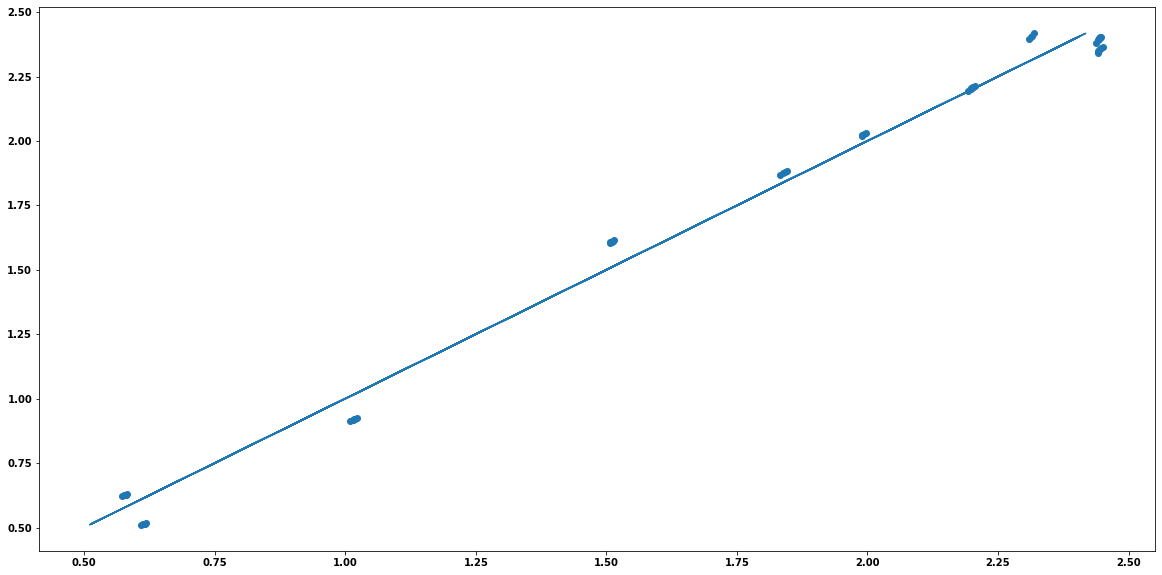

In [92]:
plt.figure(figsize=(20,10))
plt.scatter(y2_pre, y2_train)
plt.plot(y2_train, y2_train)
plt.show()

In [93]:
rmse(y2_pre, y2_train)

0.07310747450111925

In [77]:
y2_pred = regressor.predict(X_test)
y2_pred

array([1.84775063, 1.84049518, 2.20380937, 1.98300073, 1.99426998,
       0.58220878, 2.44351007, 2.31751546, 1.9914747 , 2.44552556,
       1.84340629, 1.99566186, 1.84485726, 0.6168072 , 2.31847399,
       2.31460143, 1.50064898, 1.02053901, 2.31655042, 1.01813271])

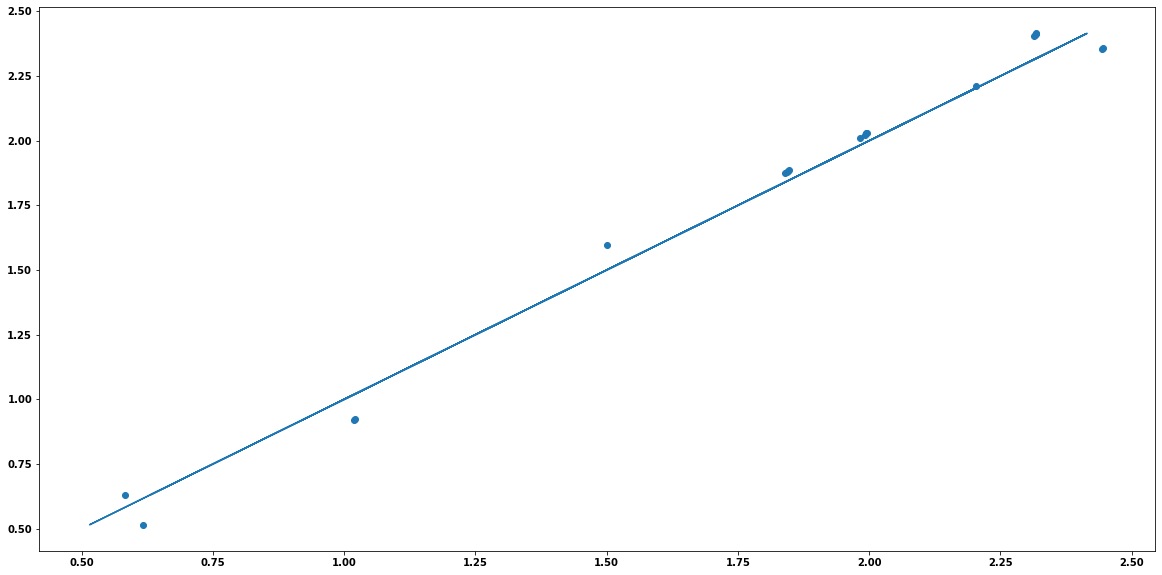

In [78]:
plt.figure(figsize=(20,10))
plt.scatter(y2_pred, y2_test)
plt.plot(y2_test, y2_test)
plt.show()

In [79]:
rmse(y2_pred, y2_test)

0.07128516022904174